In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

In [13]:
dataset = "fmnist"
# (X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# 归一化
X_train = X_train/255.
X_test = X_test/255.

In [81]:
X_train.shape

(60000, 28, 28)

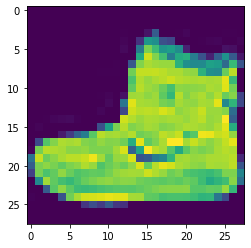

In [14]:
plt.imshow(X_train[0])

In [15]:
dnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation="relu"), 
    tf.keras.layers.Dense(256, activation="relu"), 
    tf.keras.layers.Dense(128, activation="relu"), 
    tf.keras.layers.Dense(64, activation="relu"), 
    tf.keras.layers.Dense(10, activation="softmax")
])
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 575,050
Trainable params: 575,050
Non-tr

In [16]:
dnn_model.compile(optimizer = tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
dnn_model.fit(X_train, y_train, epochs=20)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4921 - accuracy: 0.8215
Epoch 2/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3739 - accuracy: 0.8628
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3339 - accuracy: 0.8777
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step 

In [17]:
dnn_model.evaluate(X_test, y_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 1s 3ms/step - loss: 0.3664 - accuracy: 0.8821


[0.36642956733703613, 0.882099986076355]

In [22]:
pred = dnn_model.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = y_test
accuracy = tf.keras.metrics.Accuracy()
accuracy.update_state(y_pred, y_true)
accuracy.result()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


<tf.Tensor: shape=(), dtype=float32, numpy=0.0567>

In [19]:
dnn_model.save("dnn_model_" + dataset + ".h5")

In [21]:
dnn_model = tf.keras.models.load_model("dnn_model.h5")
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 575,050
Trainable params: 575,050
Non-trai

In [57]:
bnn_model = Sequential()
bnn_model.add(Flatten(input_shape=(28,28)))
bnn_model.add(Dense(256, activation="relu"))
bnn_model.add(Dense(10, activation="softmax"))
bnn_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_34 (Dense)            (None, 256)               200960    
                                                                 
 dense_35 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [25]:
pred = dnn_model.predict(X_test)
pred[0]

array([0.0000000e+00, 2.3179365e-26, 1.0000000e+00, 2.4366967e-24,
       9.6337099e-26, 0.0000000e+00, 4.1226201e-37, 4.7554243e-34,
       9.7432126e-27, 0.0000000e+00], dtype=float32)

In [26]:
sum = 0
for i in range(10):
    sum += pred[0][i]
sum

1.0

In [ ]:
y_pred = np.argmax(pred, axis=1)
y_true = y_test
accuracy = tf.keras.metrics.Accuracy()
accuracy.update_state(y_pred, y_true)
accuracy.result()

In [119]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

test_dict_df = pd.DataFrame(data=[['AAA','23'],['AAA','23'], ['BBB','100']],columns=['姓名', '年龄'])
test_dict_df

,姓名,年龄
0,BBB,100


In [120]:
y_train_1hot = OneHotEncoder().fit_transform(test_dict_df)
y_train_1hot.toarray()

array([[1., 1.]])

In [123]:
y_true = 0
y_pred = 5

zero_list = [0,0,0,0,0,0,0,0,0,0]


columns = ['0','1','2','3','4','5','6','7','8','9']
y_true_list = zero_list[:]
y_true_list[y_true] = 1
y_pred_list = zero_list[:]
y_pred_list[y_pred] = 1


df = pd.DataFrame(data=[y_true_list, y_pred_list],columns=columns)
y_train_1hot = OneHotEncoder().fit_transform(df).toarray()
y_train_1hot


array([[0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.]])

In [124]:
residual = y_train_1hot[0] - y_train_1hot[1]
residual

array([-1.,  1.,  0.,  0.,  0.,  0.,  1., -1.,  0.,  0.,  0.,  0.])

In [125]:
y_true = 0
y_pred = 5

zero_list = [0,0,0,0,0,0,0,0,0,0]


columns = ['0','1','2','3','4','5','6','7','8','9']
y_true_list = zero_list[:]
y_true_list[y_true] = 1
y_pred_list = zero_list[:]
y_pred_list[y_pred] = 1

print(y_true_list)
print(y_pred_list)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


In [129]:
len = len(y_pred_list)
residual = [y_true_list[i] - y_pred_list[i] for i in range(len)]
residual

[1, 0, 0, 0, 0, -1, 0, 0, 0, 0]